<a href="https://colab.research.google.com/github/Okocha76/Okocha76.github.io/blob/master/Population Change Europe 2000-2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

import math
import statistics

import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter, PercentFormatter

## Import Migration Data Countries

In [39]:
!wget https://raw.githubusercontent.com/Okocha76/Okocha76.github.io/master/demo_r_gind3_C_Data.csv

--2019-11-22 11:54:26--  https://raw.githubusercontent.com/Okocha76/Okocha76.github.io/master/demo_r_gind3_C_Data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 488033 (477K) [text/plain]
Saving to: ‘demo_r_gind3_C_Data.csv.1’

demo_r_gind3_C_Data 100%[===================>] 476.59K  --.-KB/s    in 0.06s   

2019-11-22 11:54:26 (7.49 MB/s) - ‘demo_r_gind3_C_Data.csv.1’ saved [488033/488033]



In [0]:
df = pd.read_csv('demo_r_gind3_C_Data.csv', header=0, engine='python', encoding = "ISO-8859-1")

In [41]:
print(df.shape)

(7733, 5)


In [0]:
df['Value'] = df['Value'].str.replace(' ', '')
df['Value'] = pd.to_numeric(df['Value'],errors='coerce')

In [0]:
df['INDIC_DE'] = df['INDIC_DE'].str.replace('Population on 1 January - total', 'tot_pop')
df['INDIC_DE'] = df['INDIC_DE'].str.replace('Live births - total', 'tot_birth')
df['INDIC_DE'] = df['INDIC_DE'].str.replace('Deaths - total', 'tot_death')
df['INDIC_DE'] = df['INDIC_DE'].str.replace('Natural change of population', 'nat_change')
df['INDIC_DE'] = df['INDIC_DE'].str.replace('Net migration plus statistical adjustment', 'mig_change')
df['INDIC_DE'] = df['INDIC_DE'].str.replace('Total population change', 'tot_pop_change')
df['INDIC_DE'] = df['INDIC_DE'].str.replace('Crude birth rate', 'birth_rate')
df['INDIC_DE'] = df['INDIC_DE'].str.replace('Crude death rate', 'death_rate')
df['INDIC_DE'] = df['INDIC_DE'].str.replace('Crude rate of natural change of population', 'nat_change_rate')
df['INDIC_DE'] = df['INDIC_DE'].str.replace('Crude rate of net migration plus statistical adjustment', 'mig_change_rate')
df['INDIC_DE'] = df['INDIC_DE'].str.replace('Crude rate of total population change', 'tot_pop_change_rate')

In [44]:
df.dropna(inplace=True)
df.head(12)

,TIME,GEO,GEO_LABEL,INDIC_DE,Value
0,2000,BE,Belgium,tot_pop,10239085.0
1,2000,BE,Belgium,tot_birth,116396.0
2,2000,BE,Belgium,tot_death,104903.0
3,2000,BE,Belgium,nat_change,11493.0
4,2000,BE,Belgium,mig_change,12836.0
5,2000,BE,Belgium,tot_pop_change,24329.0
6,2000,BE,Belgium,birth_rate,11.4
7,2000,BE,Belgium,death_rate,10.2
8,2000,BE,Belgium,nat_change_rate,1.1
9,2000,BE,Belgium,mig_change_rate,1.3


## Import Migration Data Regions

In [45]:
!wget https://raw.githubusercontent.com/Okocha76/Okocha76.github.io/master/demo_r_gind3_R_Data.csv

--2019-11-22 11:54:28--  https://raw.githubusercontent.com/Okocha76/Okocha76.github.io/master/demo_r_gind3_R_Data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2029877 (1.9M) [text/plain]
Saving to: ‘demo_r_gind3_R_Data.csv.1’

demo_r_gind3_R_Data 100%[===================>]   1.94M  --.-KB/s    in 0.09s   

2019-11-22 11:54:28 (22.2 MB/s) - ‘demo_r_gind3_R_Data.csv.1’ saved [2029877/2029877]



In [0]:
df_R = pd.read_csv('demo_r_gind3_R_Data.csv', header=0, engine='python', encoding = "ISO-8859-1")

In [47]:
print(df_R.shape)

(28215, 5)


In [0]:
df_R['Value'] = df_R['Value'].str.replace(' ', '')
df_R['Value'] = pd.to_numeric(df_R['Value'],errors='coerce')

In [0]:
df_R['INDIC_DE'] = df_R['INDIC_DE'].str.replace('Population on 1 January - total', 'tot_pop')
df_R['INDIC_DE'] = df_R['INDIC_DE'].str.replace('Live births - total', 'tot_birth')
df_R['INDIC_DE'] = df_R['INDIC_DE'].str.replace('Deaths - total', 'tot_death')
df_R['INDIC_DE'] = df_R['INDIC_DE'].str.replace('Natural change of population', 'nat_change')
df_R['INDIC_DE'] = df_R['INDIC_DE'].str.replace('Net migration plus statistical adjustment', 'mig_change')
df_R['INDIC_DE'] = df_R['INDIC_DE'].str.replace('Total population change', 'tot_pop_change')
df_R['INDIC_DE'] = df_R['INDIC_DE'].str.replace('Crude birth rate', 'birth_rate')
df_R['INDIC_DE'] = df_R['INDIC_DE'].str.replace('Crude death rate', 'death_rate')
df_R['INDIC_DE'] = df_R['INDIC_DE'].str.replace('Crude rate of natural change of population', 'nat_change_rate')
df_R['INDIC_DE'] = df_R['INDIC_DE'].str.replace('Crude rate of net migration plus statistical adjustment', 'mig_change_rate')
df_R['INDIC_DE'] = df_R['INDIC_DE'].str.replace('Crude rate of total population change', 'tot_pop_change_rate')

In [50]:
df_R.dropna(inplace=True)
df_R.tail(10)

,TIME,GEO,GEO_LABEL,INDIC_DE,Value
28105,2018,TR3,Ege,tot_pop,10383963.0
28116,2018,TR4,Dogu Marmara,tot_pop,7824597.0
28127,2018,TR5,Bati Anadolu,tot_pop,7871847.0
28138,2018,TR6,Akdeniz,tot_pop,10303984.0
28149,2018,TR7,Orta Anadolu,tot_pop,3977447.0
28160,2018,TR8,Bati Karadeniz,tot_pop,4574182.0
28171,2018,TR9,Dogu Karadeniz,tot_pop,2633417.0
28182,2018,TRA,Kuzeydogu Anadolu,tot_pop,2188214.0
28193,2018,TRB,Ortadogu Anadolu,tot_pop,3854869.0
28204,2018,TRC,Güneydogu Anadolu,tot_pop,8665165.0


## Surplus deficit plots

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:85: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


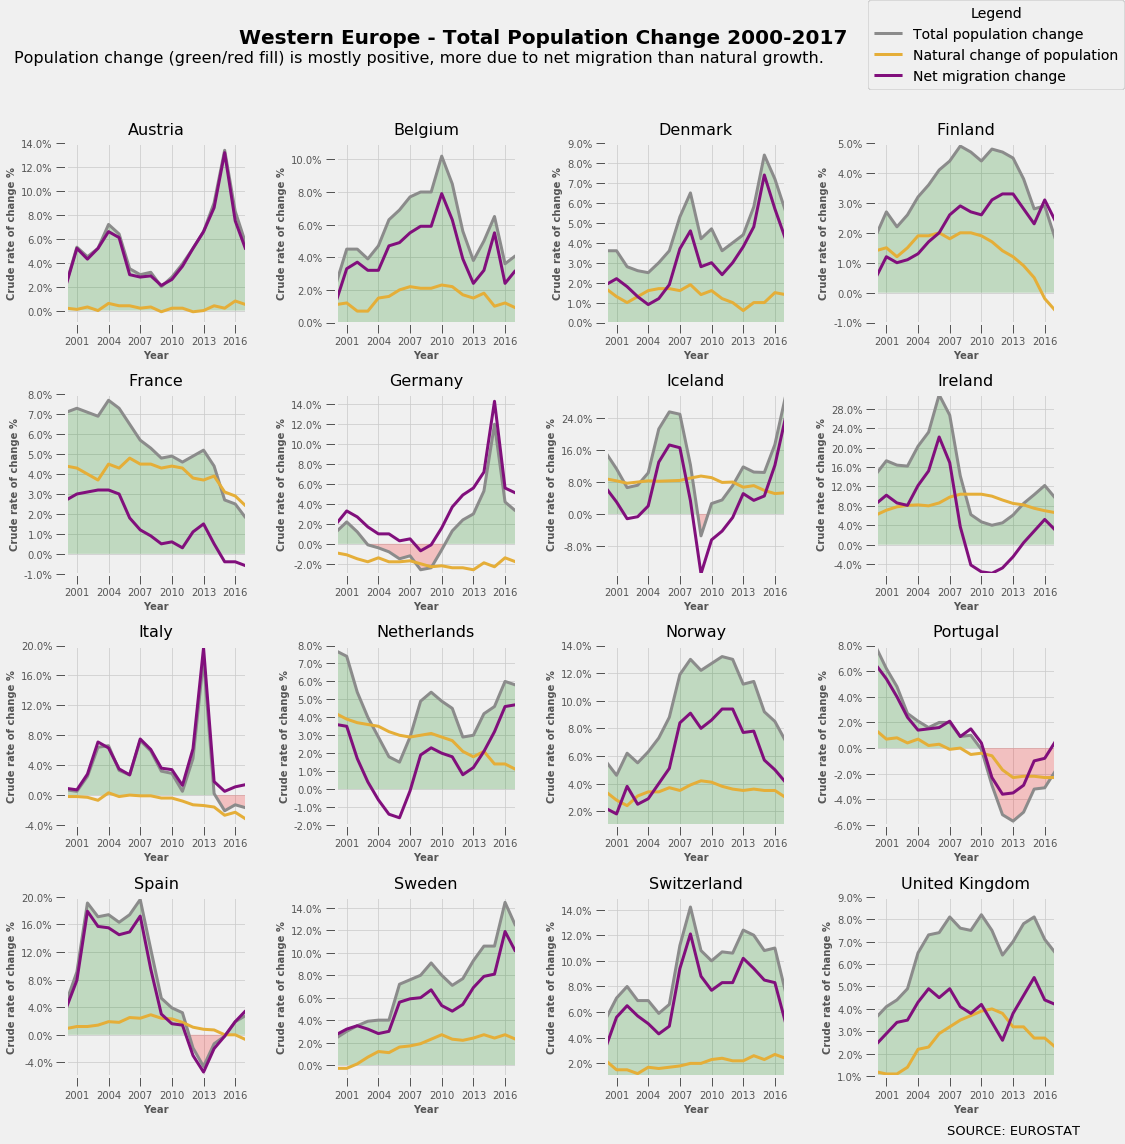

In [51]:
pos = 1
style.use('fivethirtyeight')

fig = plt.figure(figsize=(16,16))

fig.suptitle('Western Europe - Total Population Change 2000-2017', fontsize=20, fontweight='bold')
fig.text(s='Population change (green/red fill) is mostly positive, more due to net migration than natural growth.', y=.95, x=0.04, fontsize=16)
# fig.text(s='Population change (green/red fill) is mostly negative, due to net migration and declining natural growth.', y=.95, x=0.04, fontsize=16)
fig.text(s='SOURCE: EUROSTAT', y=0.02, x=0.85, fontsize=13)

plt.rcParams.update({'figure.max_open_warning': 0})
fig.subplots_adjust(hspace=0.4, wspace=0.4)

def mig_plot(country, pos):
  result = country

  criteria_1 = (df['GEO'] == country)
  criteria_2 = (df['INDIC_DE'] == 'tot_pop_change_rate')
  criteria_3 = (df['INDIC_DE'] == 'nat_change_rate')
  criteria_4 = (df['INDIC_DE'] == 'mig_change_rate')

  criteria_tot = criteria_1 & criteria_2
  criteria_nat = criteria_1 & criteria_3
  criteria_mig = criteria_1 & criteria_4

  totR = df[criteria_tot].reset_index()
  natR = df[criteria_nat].reset_index()
  migR = df[criteria_mig].reset_index()

  ymin = math.floor(min(min(totR['Value']), min(natR['Value']), min(migR['Value'])))
  ymax = math.ceil(max(max(totR['Value']), max(natR['Value']), max(migR['Value'])))
  ydif = ymax-ymin

  if ydif <= 5:
    y_mul_loc = 0.500
  elif ydif <= 10:
    y_mul_loc = 1.000
  elif ydif <= 20:
    y_mul_loc = 2.000
  elif ydif <= 40:
    y_mul_loc = 4.000
  else:
    y_mul_loc = 8.000
  
  ax = fig.add_subplot(4, 4, pos, aspect=(17/ydif))
  
  ax.xaxis.set_major_locator(MultipleLocator(3.000))
  ax.yaxis.set_major_locator(MultipleLocator(y_mul_loc))
  ax.yaxis.set_major_formatter(PercentFormatter(100))

  ax.tick_params(axis = 'both', which = 'major', labelsize = 10)

  ax.set_ylim(math.floor(min(min(totR['Value']), min(natR['Value']), min(migR['Value']))),
          math.ceil(max(max(totR['Value']), max(natR['Value']), max(migR['Value']))))
  ax.set_xlim(2000,2017)

  ax.tick_params(which='major', width=1.0)
  ax.tick_params(which='major', length=10)

  # Area Chart
  x = totR['TIME']
  y = totR['Value']

  ax.fill_between(x[0:], y[0:], 0, where=y[0:] >= 0, facecolor='green', interpolate=True, alpha=0.2)
  ax.fill_between(x[0:], y[0:], 0, where=y[0:] <= 0, facecolor='red', interpolate=True, alpha=0.2)

  line_labels = ["Total population change", "Natural change of population", "Net migration change"]
  
  # Line Charts
  l1 = ax.plot('TIME', 'Value', data=totR, color='#8b8b8b', lw=3)
  l2 = ax.plot('TIME', 'Value', data=natR, color='#e5ae38', lw=3)
  l3 = ax.plot('TIME', 'Value', data=migR, color='#810f7c', lw=3)

  ax.set_title(statistics.mode(totR['GEO_LABEL']), fontsize=16, verticalalignment='bottom')
  ax.set_xlabel("Year", fontsize=10, fontweight='bold')
  ax.set_ylabel("Crude rate of change %", fontsize=10, fontweight='bold')

  ax.legend().set_visible(False)

  ax.grid(alpha=0.75)
  fig.legend([l1, l2, l3],     
           labels=line_labels, 
           loc="upper right",  
           borderaxespad=0.1,  
           title="Legend"  
           )
  fig.show();

countries1 = ['AT','BE','DK','FI','FR','DE','IS','IE',
              'IT','NL','NO','PT','ES','SE','CH','UK']

countries2 = ['AL','BG','EE','HR','CZ','EL','HU','LV',
              'LT','ME','MK','PL','RO','RS','SK','SI']

# countries =  ['AT','BE','BG','HR','CY','CZ','DK','EE','FI','FR','DE','EL',
#              'HU','IS','IE','IT','LV','LI','LT','LU','MT','ME','NL','MK','NO',
#              'PL','PT','RO','RS','SK','SI','ES','SE','CH','TR','UK']

for country in countries1:
    mig_plot(country, pos)   
    pos += 1

## Regional Top & Bottom 25 Bar Charts

In [0]:
regions = ['BE1','BE2','BE3','BG3','BG4','CZ0','DK0','DE1','DE2','DE3','DE4',
           'DE5','DE6','DE7','DE8','DE9','DEA','DEB','DEC','DED','DEE','DEF',
           'DEG','EE0','IE0','EL5','EL6','EL3','EL4','ES1','ES2','ES3','ES4',
           'ES5','ES6','ES7','FR1','FRB','FRC','FRD','FRE','FRF','FRG','FRH',
           'FRI','FRJ','FRK','FRL','FRM','FRY','FR2','FR3','FR4','FR5','FR6',
           'FR7','FR8','FRA','HR0','ITC','ITH','ITI','ITF','ITG','CY0','LV0',
           'LT0','LU0','HU1','HU2','HU3','MT0','NL1','NL2','NL3','NL4','AT1',
           'AT2','AT3','PL1','PL2','PL3','PL4','PL5','PL6','PL7','PL8','PL9',
           'PT1','PT2','PT3','RO1','RO2','RO3','RO4','SI0','SK0','FI1','FI2',
           'SE1','SE2','SE3','UKC','UKD','UKE','UKF','UKG','UKH','UKI','UKJ',
           'UKK','UKL','UKM','UKN','IS0','LI0','NO0','CH0','ME0','MK0','AL0',
           'RS1','RS2','TR1','TR2','TR3','TR4','TR5','TR6','TR7','TR8','TR9',
           'TRA','TRB','TRC']

tot_mig = np.empty((0, 2))

for region in regions: 

    criteria_1 = (df_R['GEO'] == region)
    criteria_2 = (df_R['INDIC_DE'] == 'mig_change')

    criteria_mig = criteria_1 & criteria_2

    migR = df_R[criteria_mig].reset_index()

    tot_mig = np.append(tot_mig, [(region, sum(migR['Value']))], axis=0)

mig_df = pd.DataFrame(data=tot_mig[:,:],
             index=range(len(tot_mig)),         
             columns=['GEO','Tot Mig'])

In [0]:
# Create a slimmed dataframe, which contains both 'GEO' & 'GEO_LABEL' 

criteria_2 = (df_R['INDIC_DE'] == 'mig_change')
criteria_3 = (df_R['TIME'] == 2017)
criteria_mig = criteria_2 & criteria_3

migR_slim = df_R[criteria_mig]
migR_slim = migR_slim.drop(['TIME', 'INDIC_DE', 'Value'], axis=1)

In [54]:
mig_df2 = pd.merge(mig_df,migR_slim)
mig_df2['Tot Mig'] = pd.to_numeric(mig_df2['Tot Mig'],errors='coerce')
mig_df2.head()

,GEO,Tot Mig,GEO_LABEL
0,BE1,105504.0,Région de Bruxelles-Capitale / Brussels Hoofds...
1,BE2,484484.0,Vlaams Gewest
2,BE3,255050.0,Région wallonne
3,BG3,-367558.0,Severna i yugoiztochna Bulgaria
4,BG4,-31376.0,Yugozapadna i yuzhna tsentralna Bulgaria


In [0]:
# Create datasets with regions with most positive and most negative 
# total net migration in the period 2000-2017.

top_25 = mig_df2.sort_values(by='Tot Mig', ascending=False)[:25].reset_index()
bottom_25 = mig_df2.sort_values(by='Tot Mig', ascending=True)[:25].reset_index()

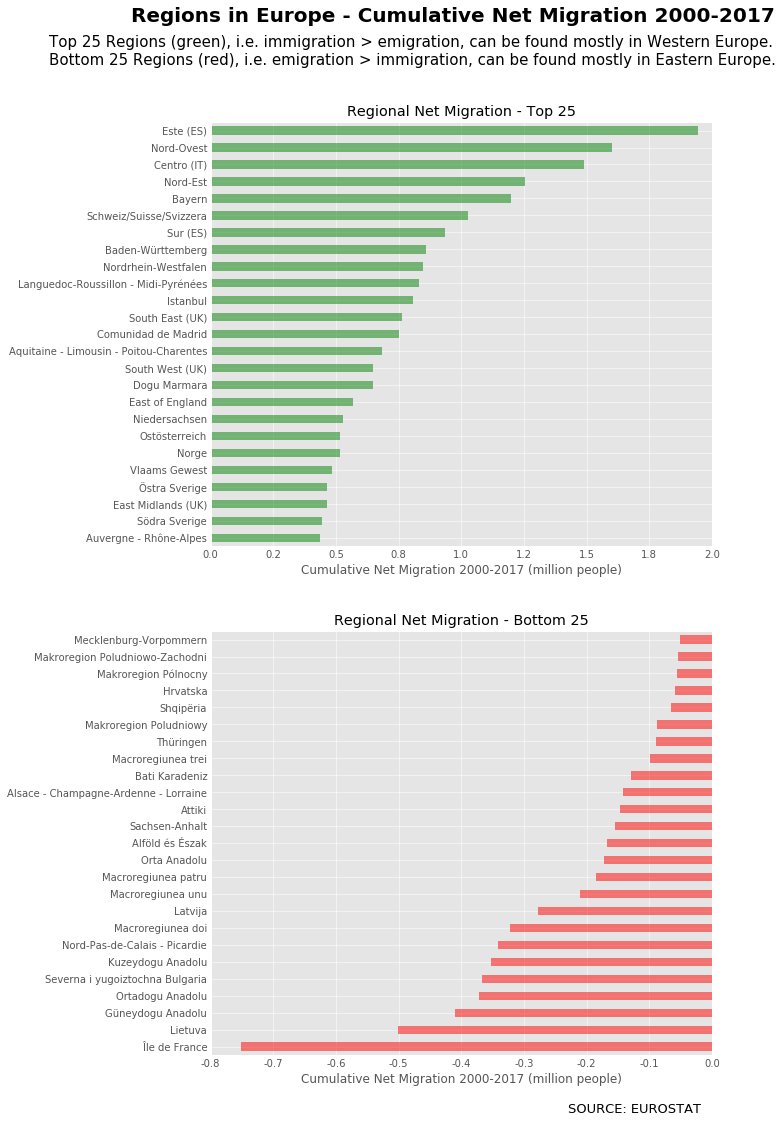

In [56]:
# Function to help format total net migration numbers.

def millions(x, pos):
    'The two args are the value and tick position'
    return '{:1.1f}'.format(x*1e-6)

plt.style.use('ggplot')

fig, (ax1, ax0) = plt.subplots(nrows=2, ncols=1, figsize=(8, 16))

bottom_25.plot(kind='barh', y='Tot Mig', x='GEO_LABEL', color='red', alpha=0.5, ax=ax0)
top_25.plot(kind='barh', y='Tot Mig', x='GEO_LABEL', color='green', alpha=0.5, ax=ax1)

ax0.set_xlim([-800000,0])
ax0.set(title='Regional Net Migration - Bottom 25', xlabel='Cumulative Net Migration 2000-2017 (million people)', ylabel='Region')

ax1.set_xlim([0, 2000000])
ax1.set(title='Regional Net Migration - Top 25', xlabel='Cumulative Net Migration 2000-2017 (million people)', ylabel='Region')
ax1.invert_yaxis()

formatter = FuncFormatter(millions)

ax0.xaxis.set_major_formatter(formatter)
ax0.yaxis.label.set_visible(False)
ax0.legend().set_visible(False)

ax1.xaxis.set_major_formatter(formatter)
ax1.yaxis.label.set_visible(False)
ax1.legend().set_visible(False)

fig.suptitle('Regions in Europe - Cumulative Net Migration 2000-2017', fontsize=20, fontweight='bold')
fig.text(s='Top 25 Regions (green), i.e. immigration > emigration, can be found mostly in Western Europe.\nBottom 25 Regions (red), i.e. emigration > immigration, can be found mostly in Eastern Europe.', y=.93, x=-0.2, fontsize=15)
fig.text(s='SOURCE: EUROSTAT', y=0.02, x=0.7, fontsize=13)

ax0.grid(alpha=0.5)
ax1.grid(alpha=0.5)

fig.show()  